In this Jupyter Notebook i am going to explore the capabilities of YOLOv8, a robust computer vision model renowned for its object detection prowess, made by Ultralytics, a startup centered around building this type of models.

The aim of the notebook is to train a YOLOV8 model to identify if construction workers are wearing a safety helmet or not. This can be used as a safety measure to be implemented in some workplaces

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# We are now saving the home directory in a variable, so it can be used later.

import os
HOME = '/content/drive/MyDrive/COMPUTER VISION/INDIVIDUAL_ASSIGNMENT/Hard Hat Workers.v2-raw_75-25_traintestsplit.yolov8.zip (Unzipped Files)'
print(HOME)

os.environ['KMP_DUPLICATE_LIB_OK']='True'

/content/drive/MyDrive/COMPUTER VISION/INDIVIDUAL_ASSIGNMENT/Hard Hat Workers.v2-raw_75-25_traintestsplit.yolov8.zip (Unzipped Files)


This other command is used to detect if our colab enviroment has the GPU hardware accelerator enabled. If it is not enabled, we will not be able to train our model.

In [ ]:
!nvidia-smi

Sun Jun 11 18:06:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

We also need to install the required library to run YOLOV8, which, along with Deep Learning libraries, is Ultralytics.

In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 595.6/595.6 kB 40.6 MB/s eta 0:00:00


In [ ]:
# Importing the required libraries, IPython is used to display the images in the notebook, ultralytics is needed to run the YOLOv8 model.

from IPython import get_ipython
get_ipython().run_line_magic('clear', '')

import ultralytics
from ultralytics import YOLO

ultralytics.checks()

Ultralytics YOLOv8.0.115 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


------------------------

Instantiating the YOLO model. As we are able to see, we want to download it and locate it inside the HOME folder.

In [ ]:
model = YOLO(f'{HOME}/yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:01<00:00, 13.5MB/s]


-----

The **golden command**, YOLO has 2 ways of being used. The first lets you use the normal python interface, while the second one lets you use the command line interface. We will be using the second one, as it is more practical and easy to use.

The settings we are using are the following:
1. task = detect - We want to detect objects inside of pictures, other options are segment, track, pose or classify.
2. mode = train - We want to train YOLOV8 on a custom dataset and score it. Other options are val, predict, export, track or bechmark.
3. model = yolov8s.pt - The actual YOLOV8 model that we are going to use in our task. The last letter makes reference to the size of the model (n,s,m,l,xl)
4. data = data.yml - The file containing the access routes to the different datasets that our model will use.
5. epochs = 30 - We want our YOLO model to train 30 times on the dataset. Each time, weights and biases are more and more optimized.
6. imgsz = 640 - The size of the images that the model is going to read. If too big, the model takes forever, if too low, the images will look like sh*t
7. plots = True - We want our model to create some informative plots about how the training and testing phases went.

**TRAINING OUR YOLO MODEL**

In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=30 imgsz=640 plots=True

/content/drive/MyDrive/COMPUTER VISION/INDIVIDUAL_ASSIGNMENT/Hard Hat Workers.v2-raw_75-25_traintestsplit.yolov8.zip (Unzipped Files)
Ultralytics YOLOv8.0.114 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=Fal

------------------------

### **TRYING OTHER MODELS - YOLOV5**

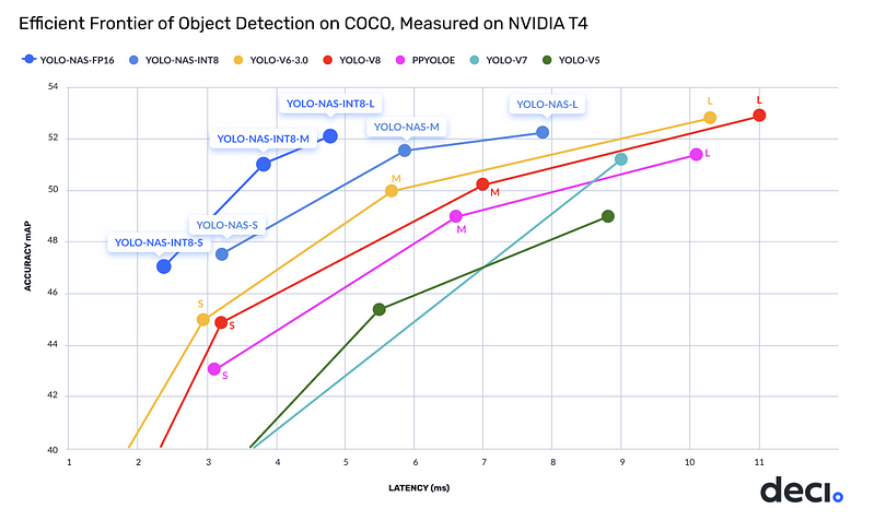

In [ ]:
from ultralytics import YOLO

# Load the model
model = YOLO(f'{HOME}/yolov5nu.pt')

In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov5su.pt data=data.yaml epochs=30 imgsz=640 plots=True

/content/drive/MyDrive/COMPUTER VISION/INDIVIDUAL_ASSIGNMENT/Hard Hat Workers.v2-raw_75-25_traintestsplit.yolov8.zip (Unzipped Files)
Ultralytics YOLOv8.0.115  Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov5su.pt, data=data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=Fal

------------------

# **RESULTS - YOLOV8 VS. YOLOV5**

## **YOLOv8**

We can say that YOLOv8 did an **astonishing** job. With a error rate of no more than a 1% when distinguishing between helmet and no-helmet. Background issues are something different and we would be also getting in the field of semantic segmentation.

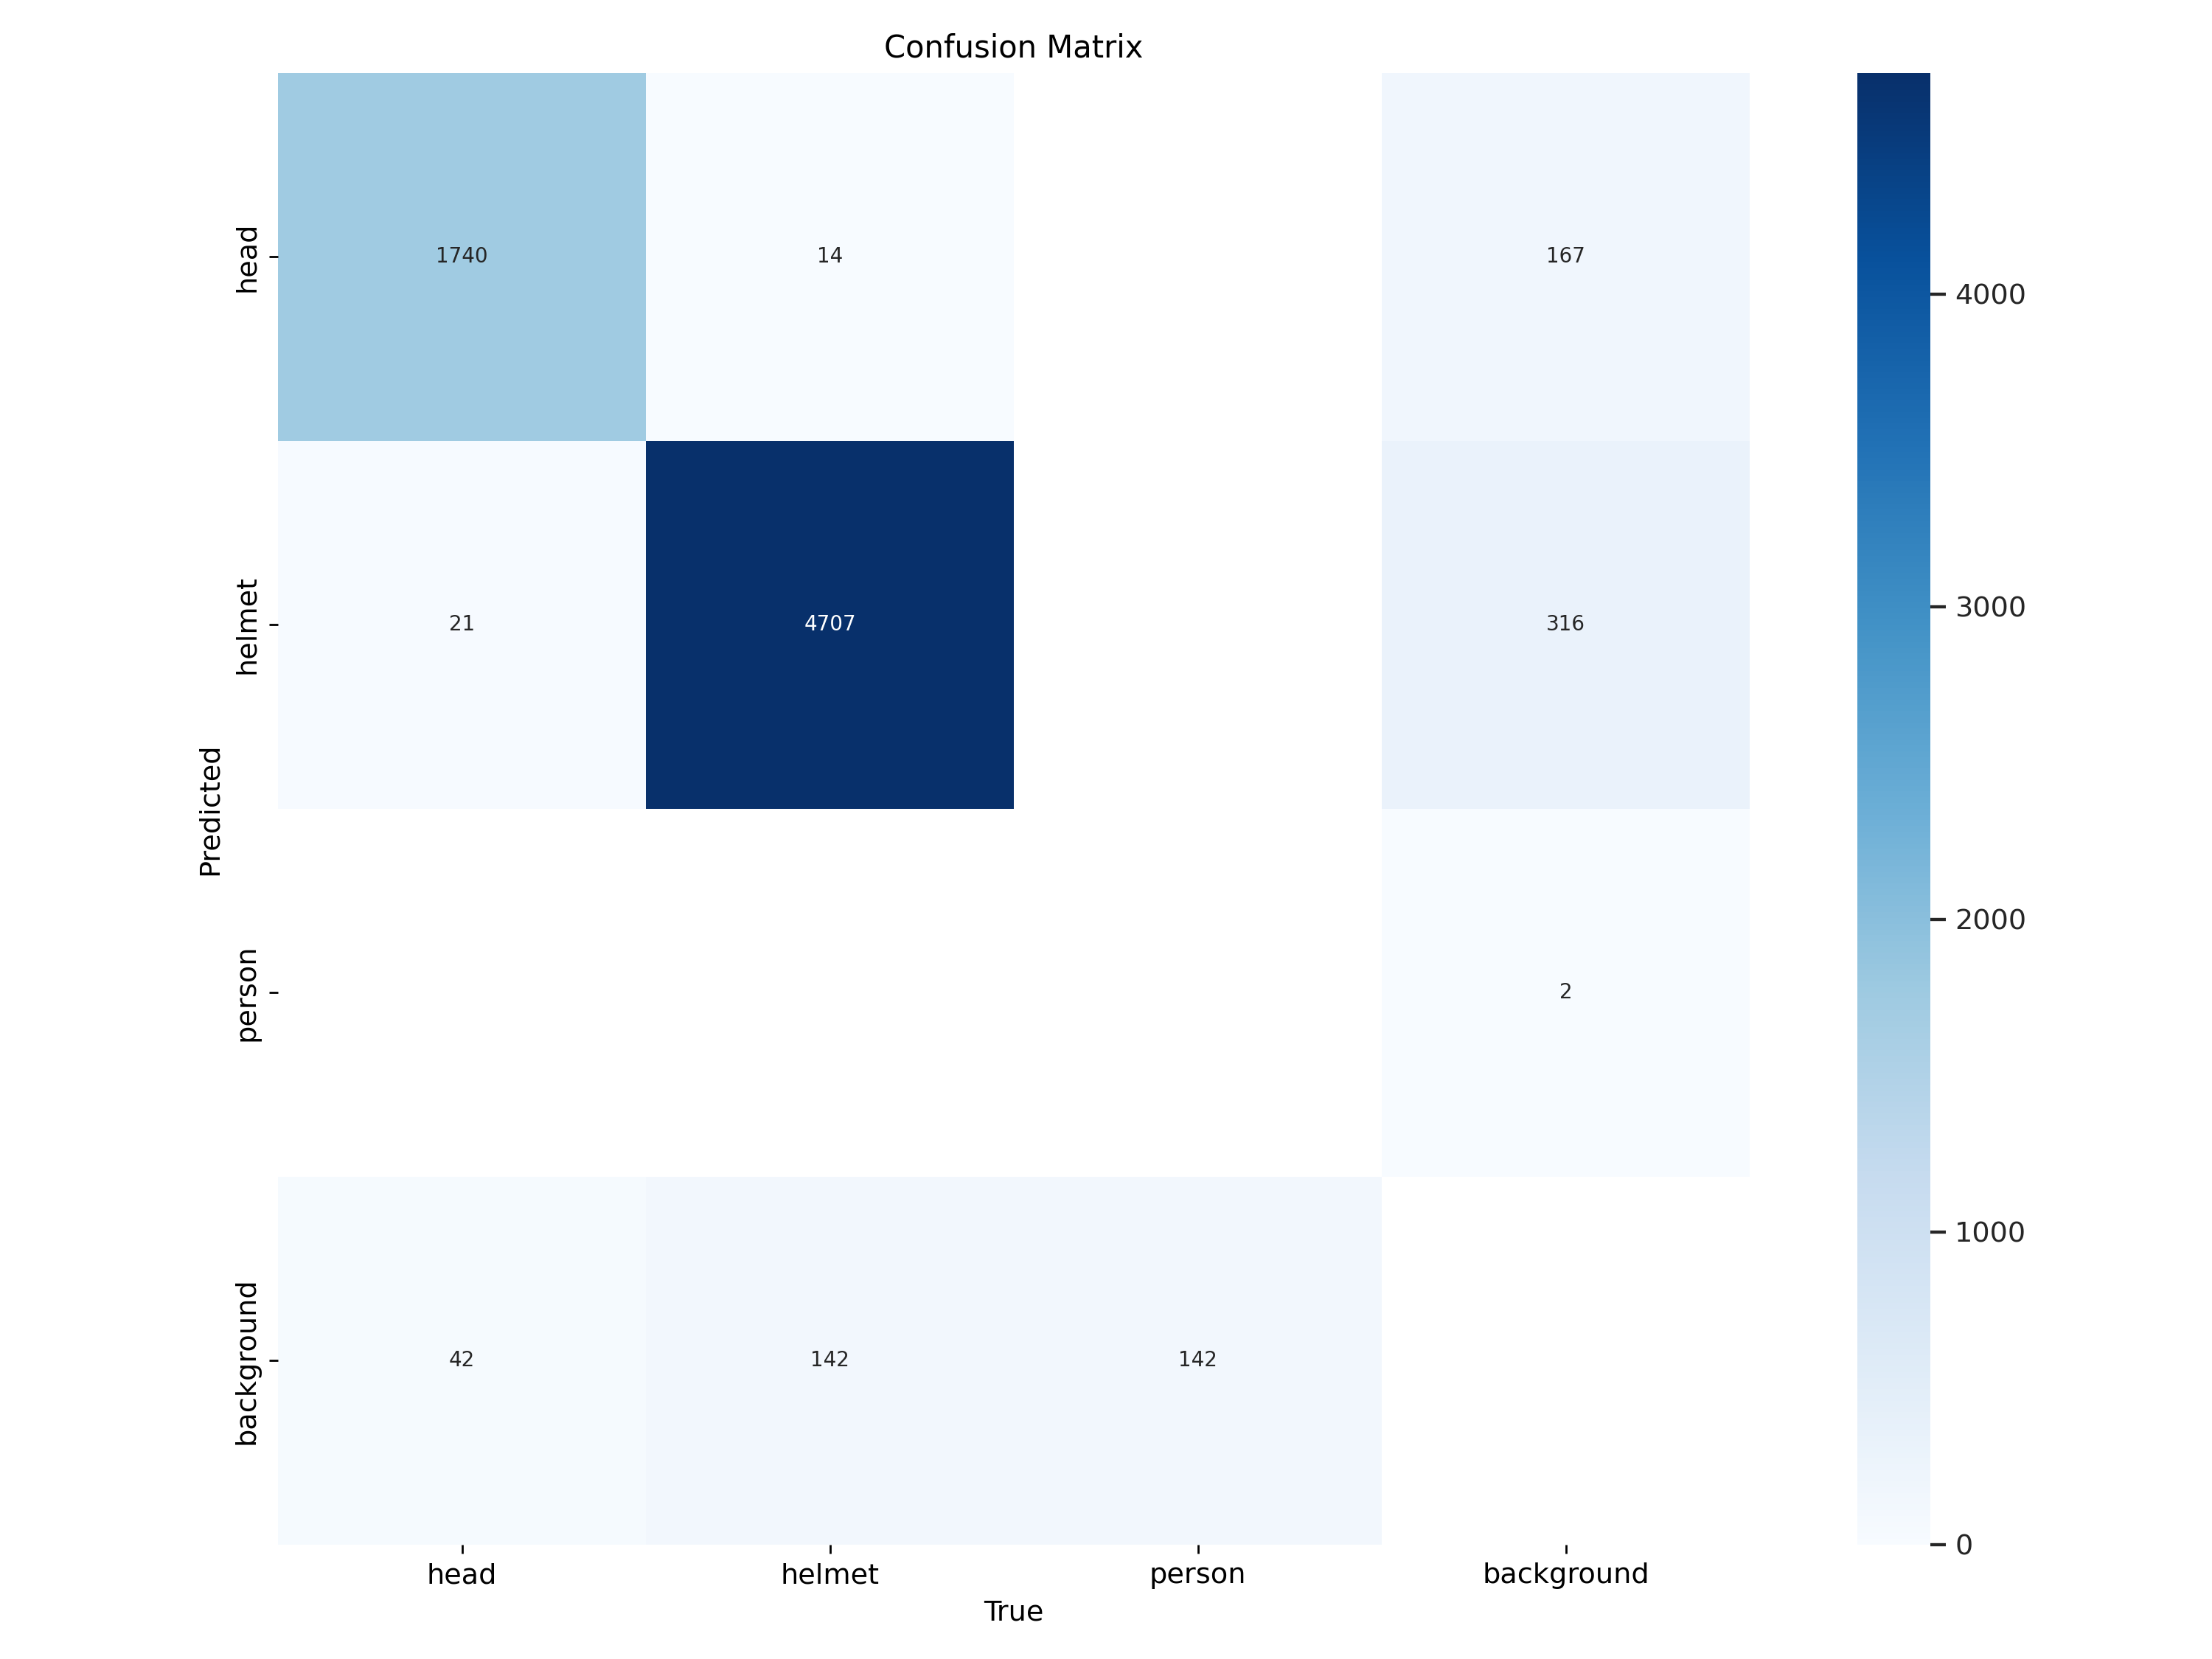

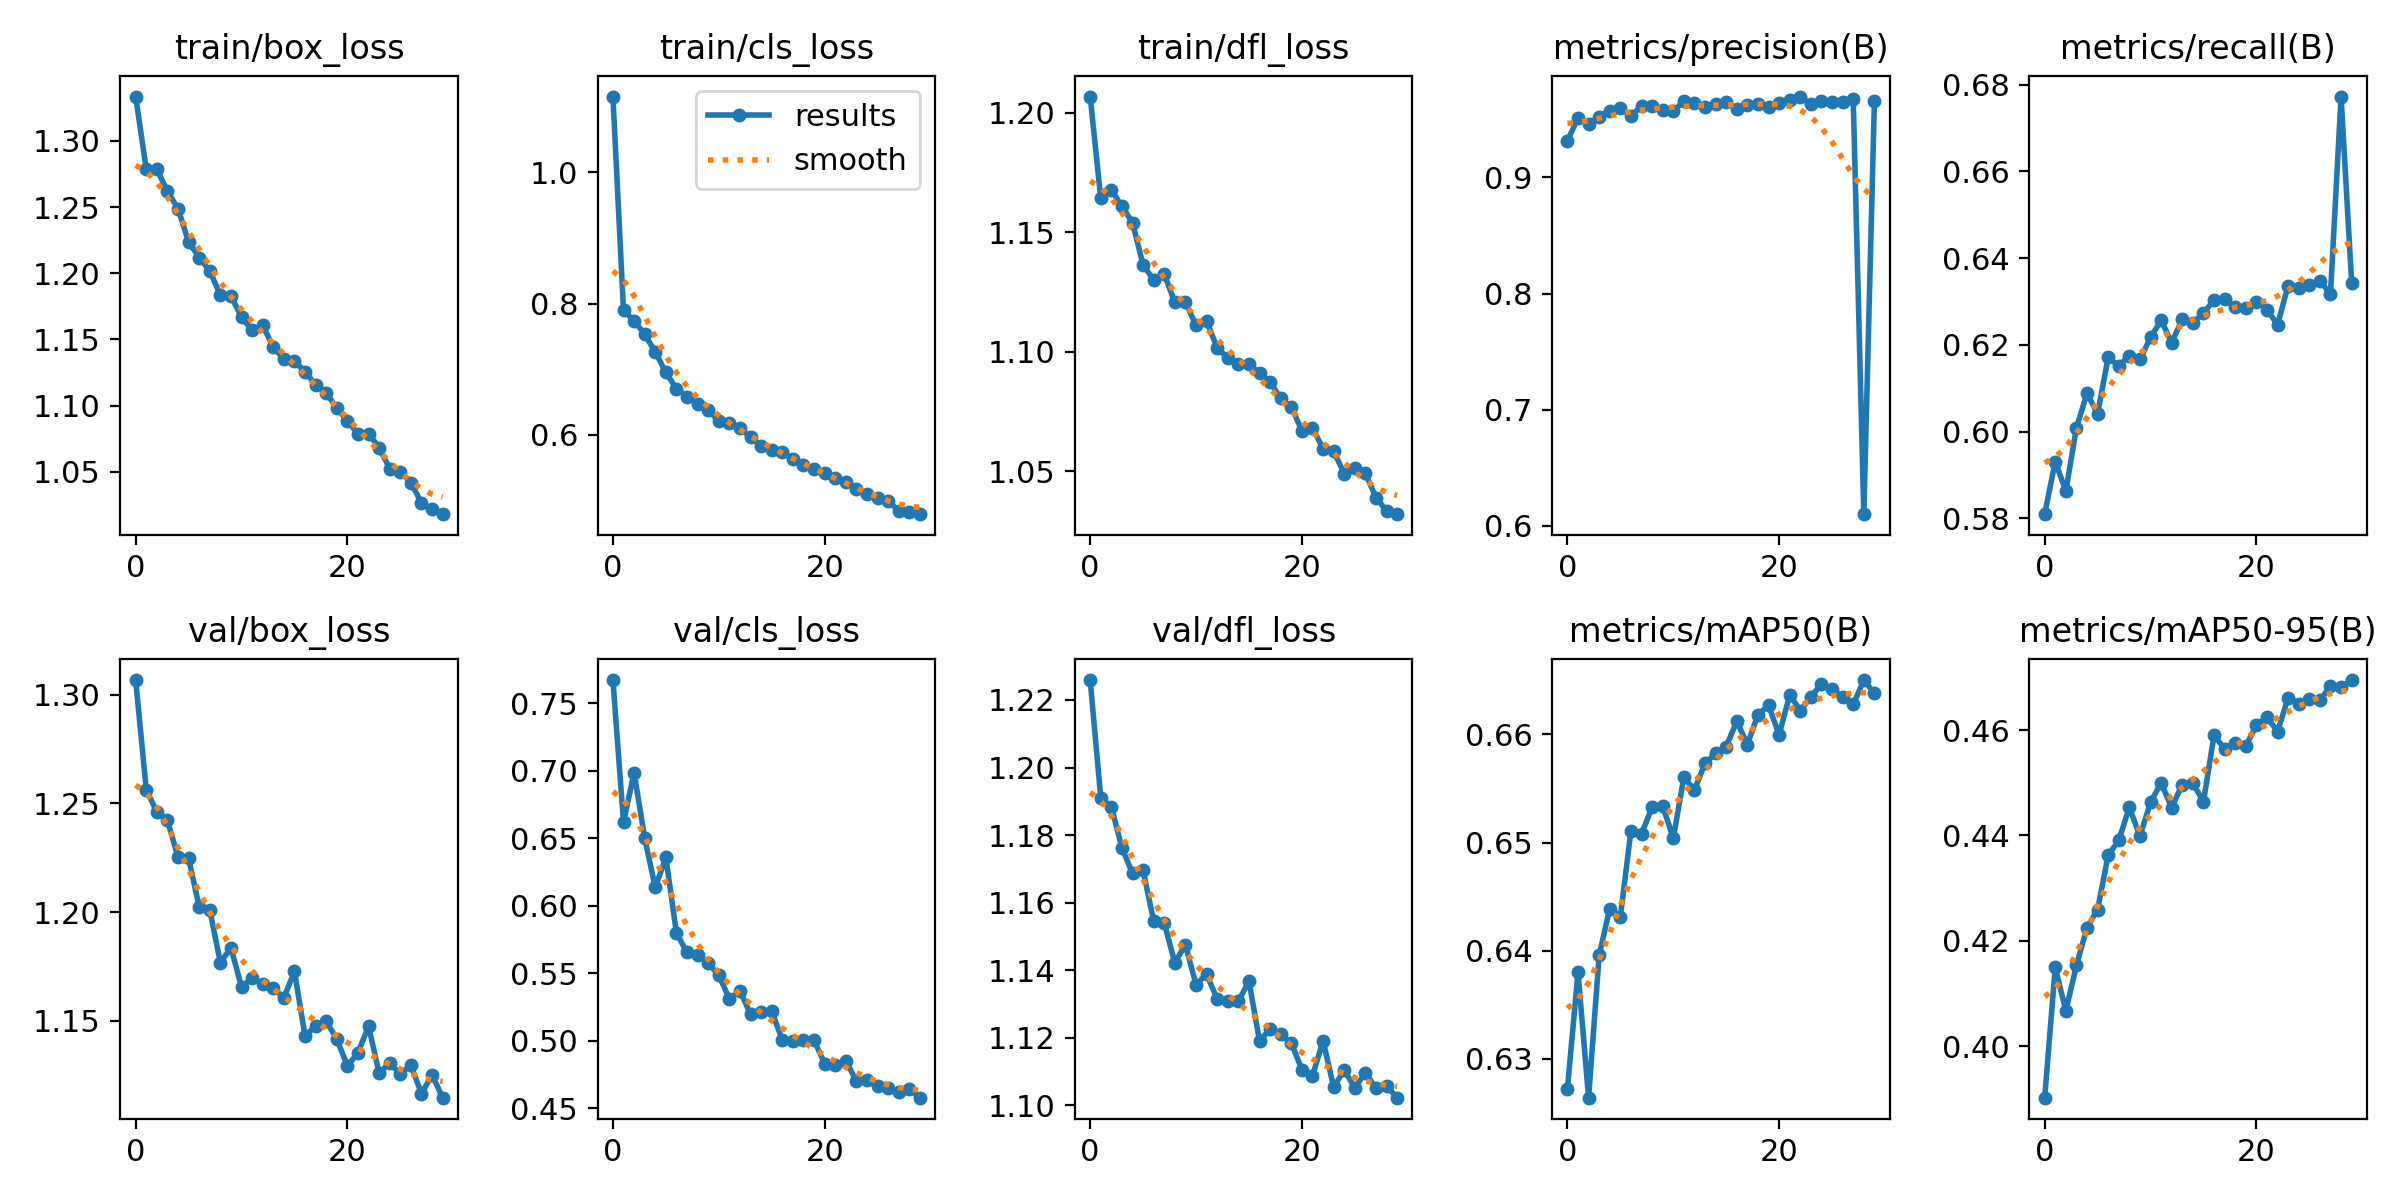

**PREDICTIONS**

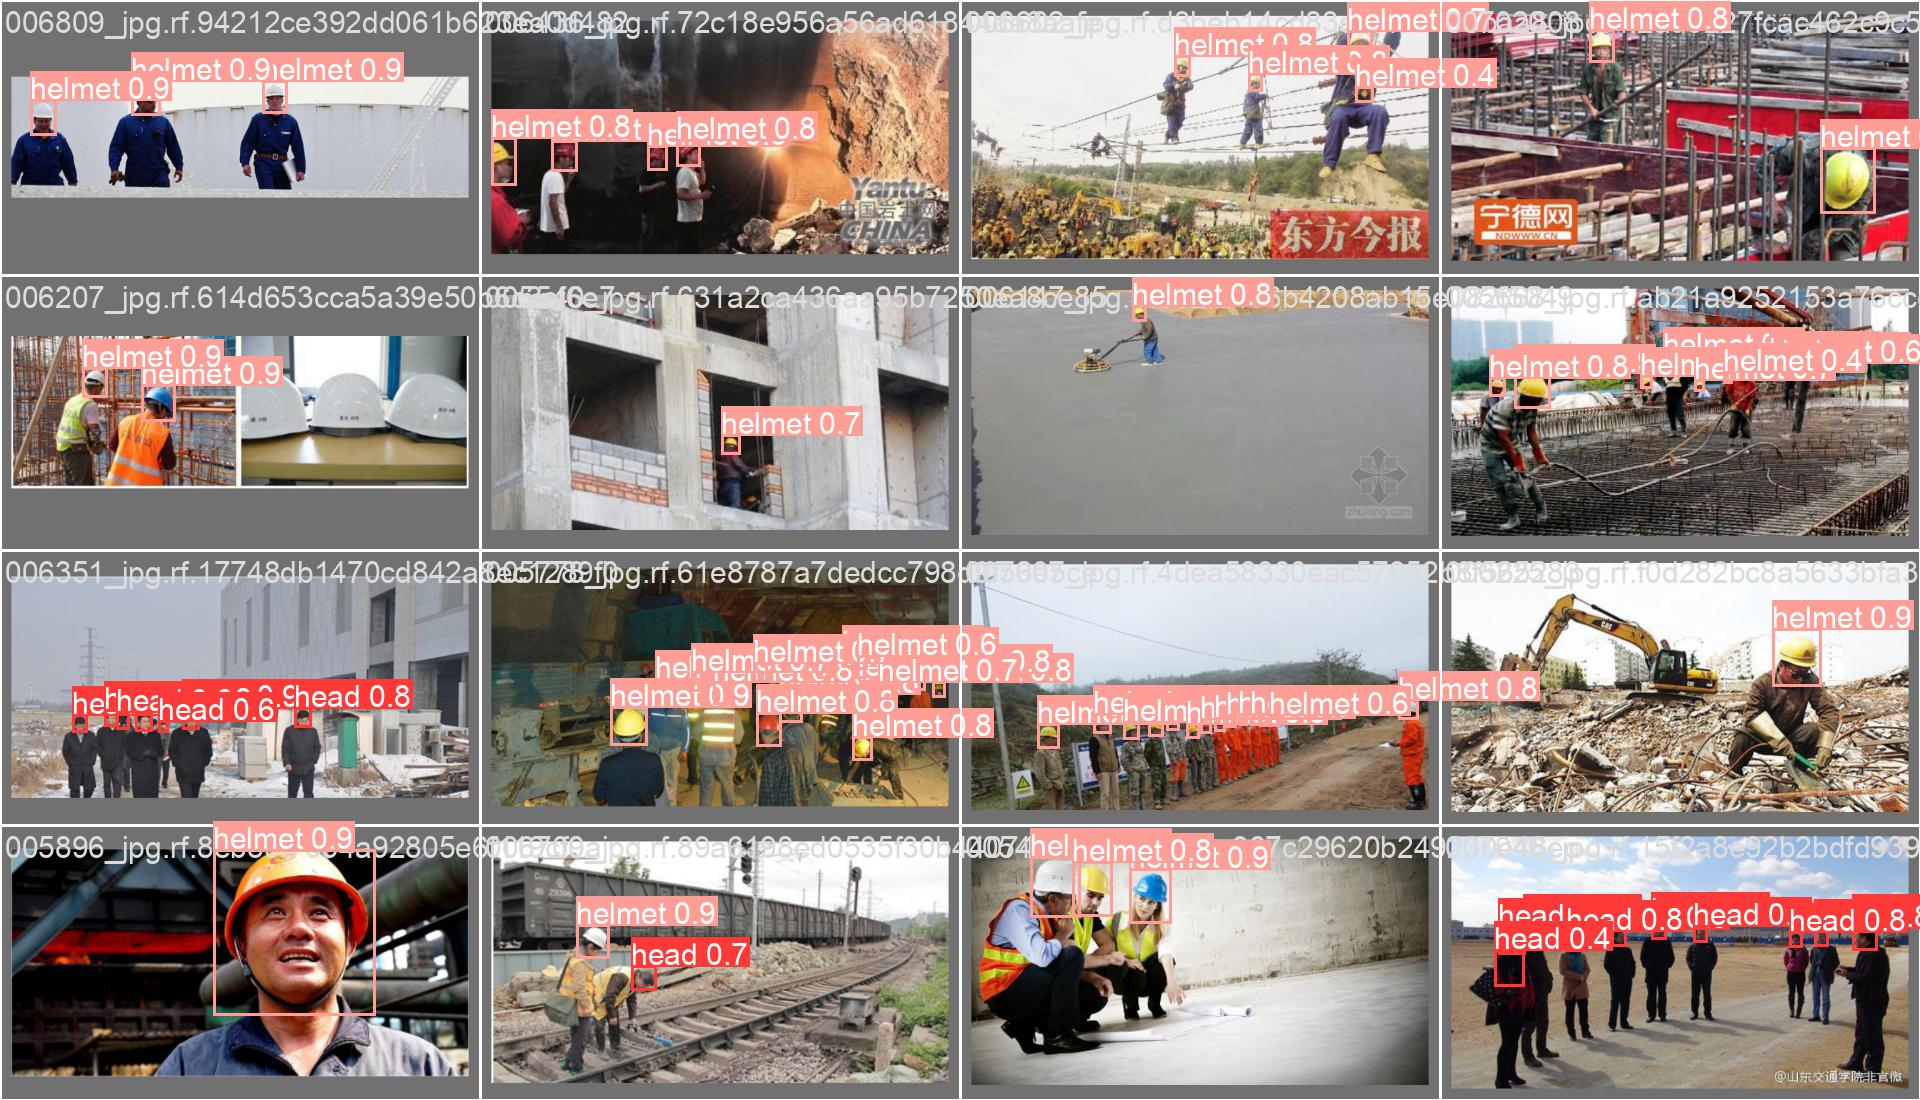

## **YOLOv5**

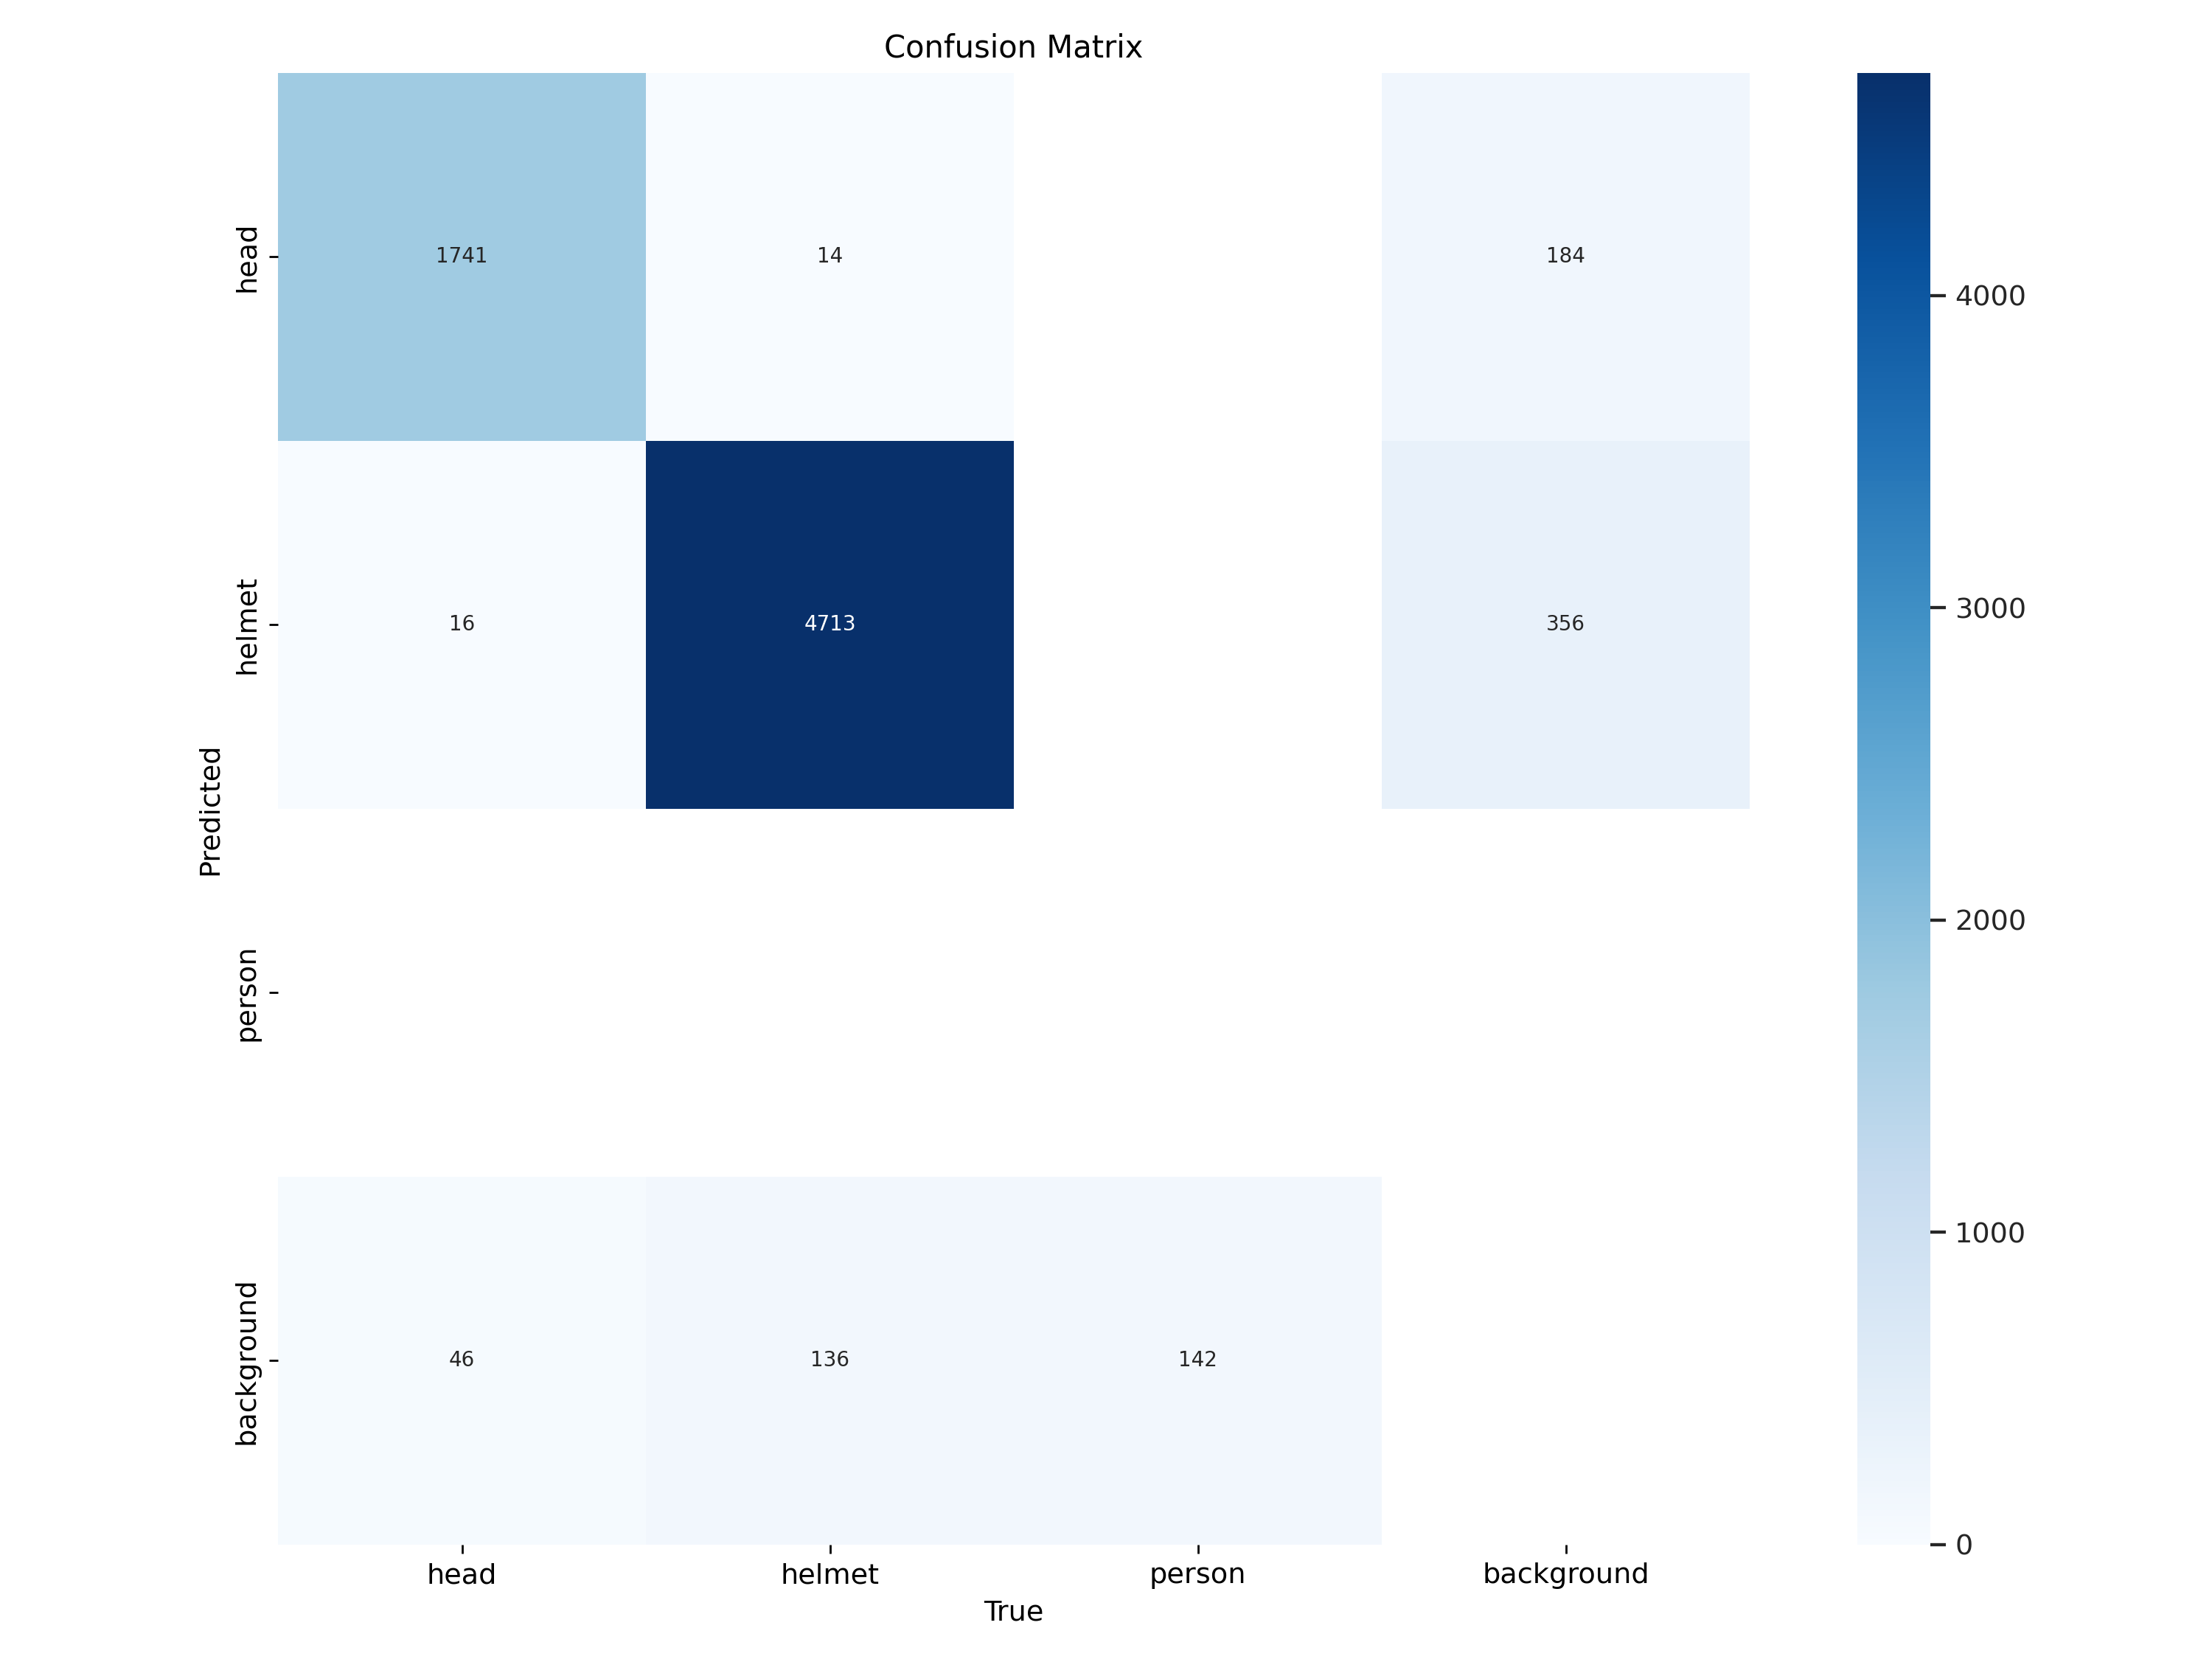

Did really YOLOv5 a better job at detecting?!?!?

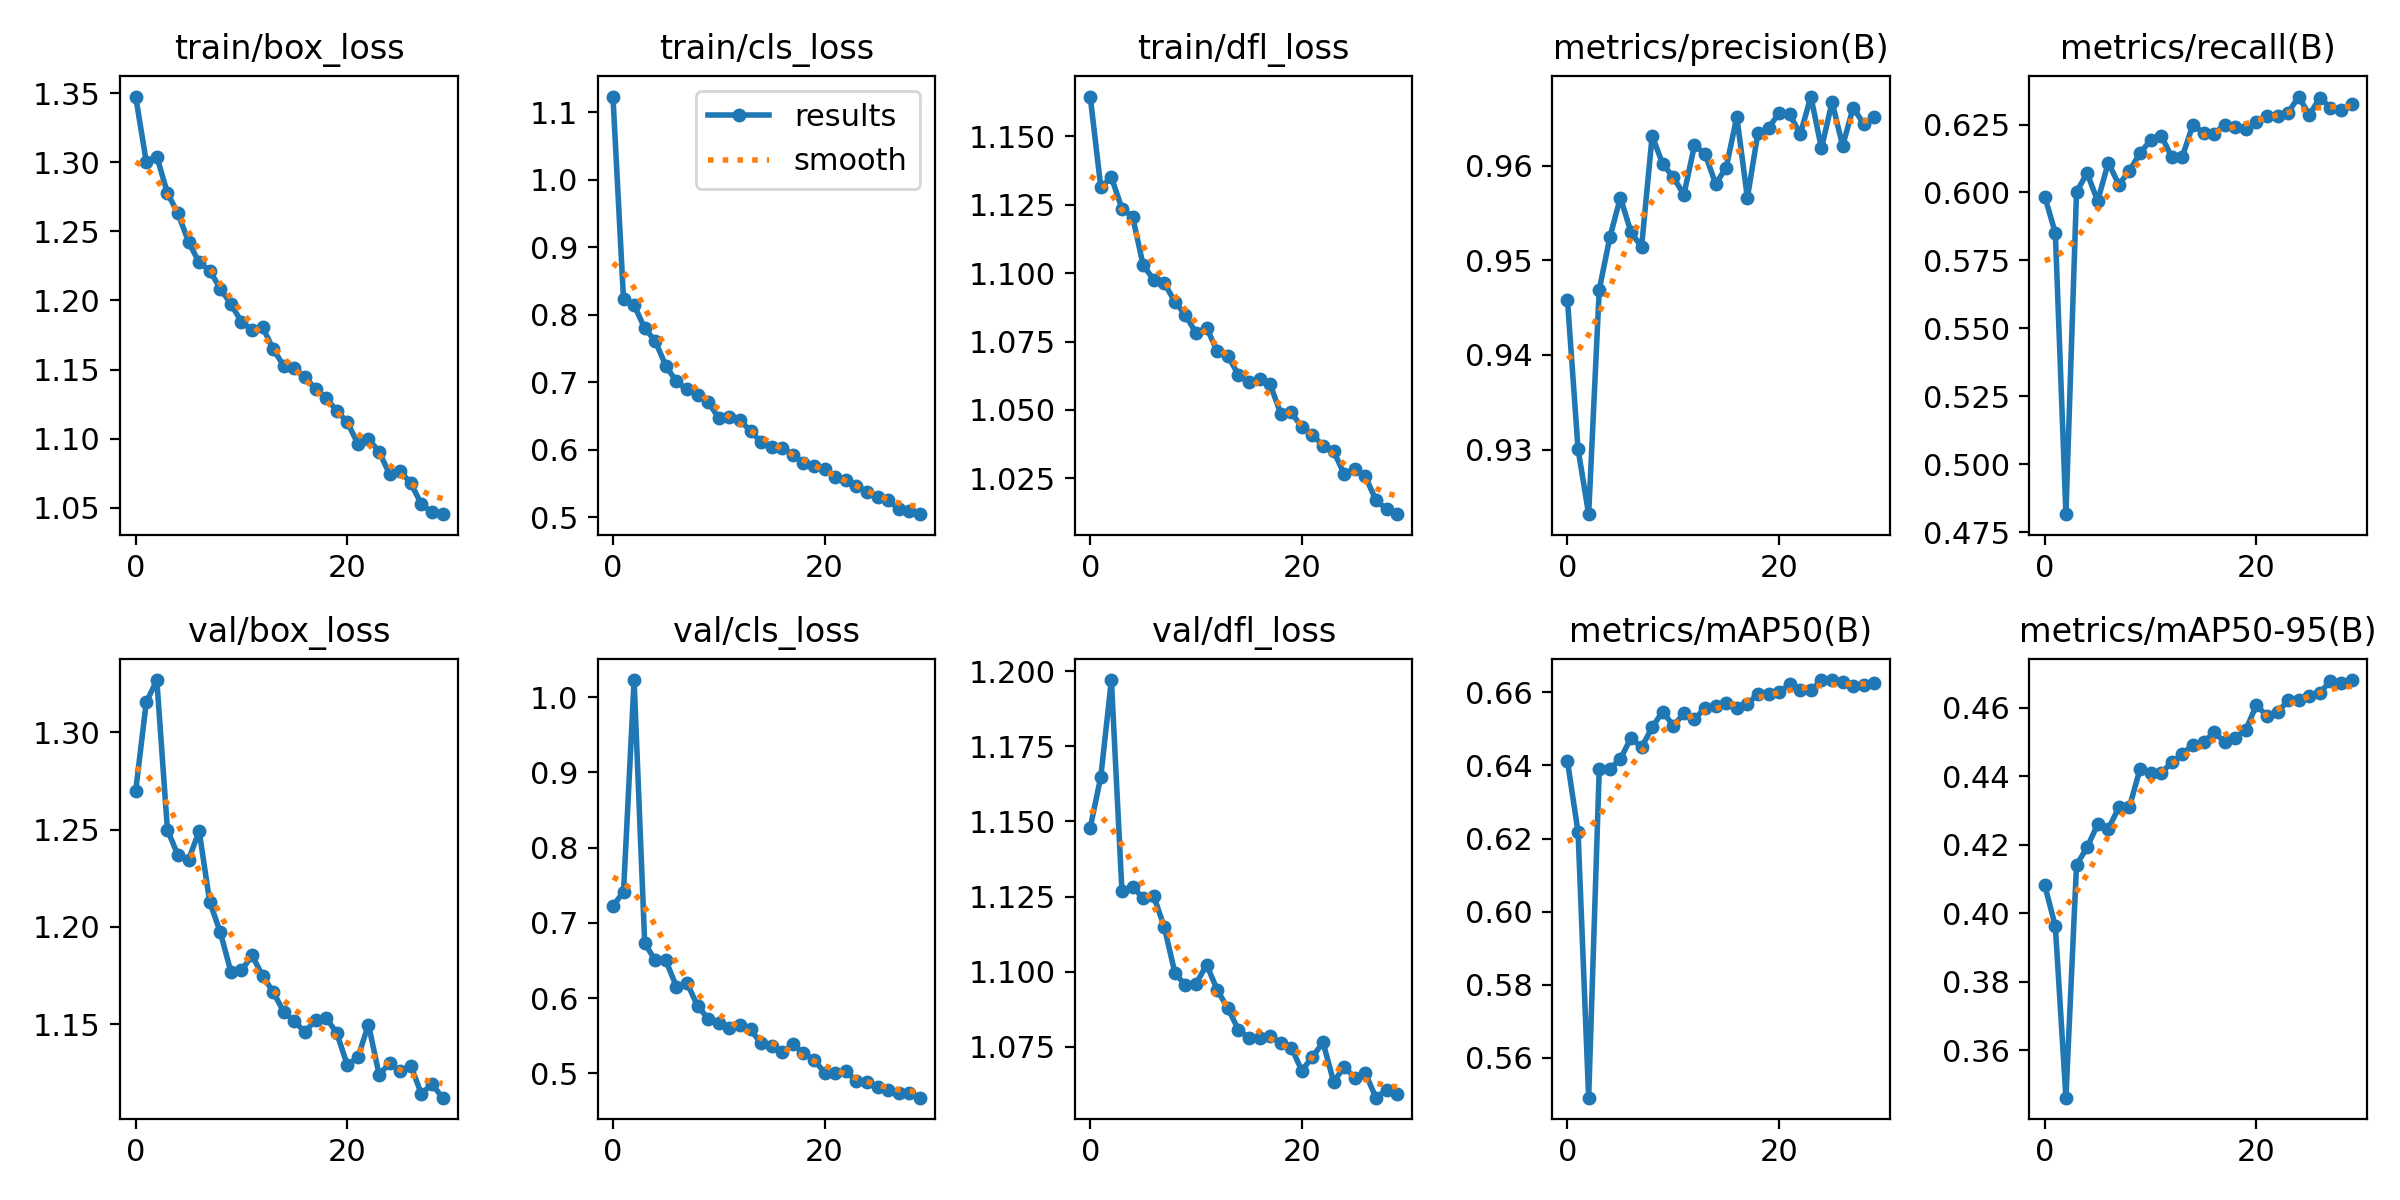

**PREDICTIONS**

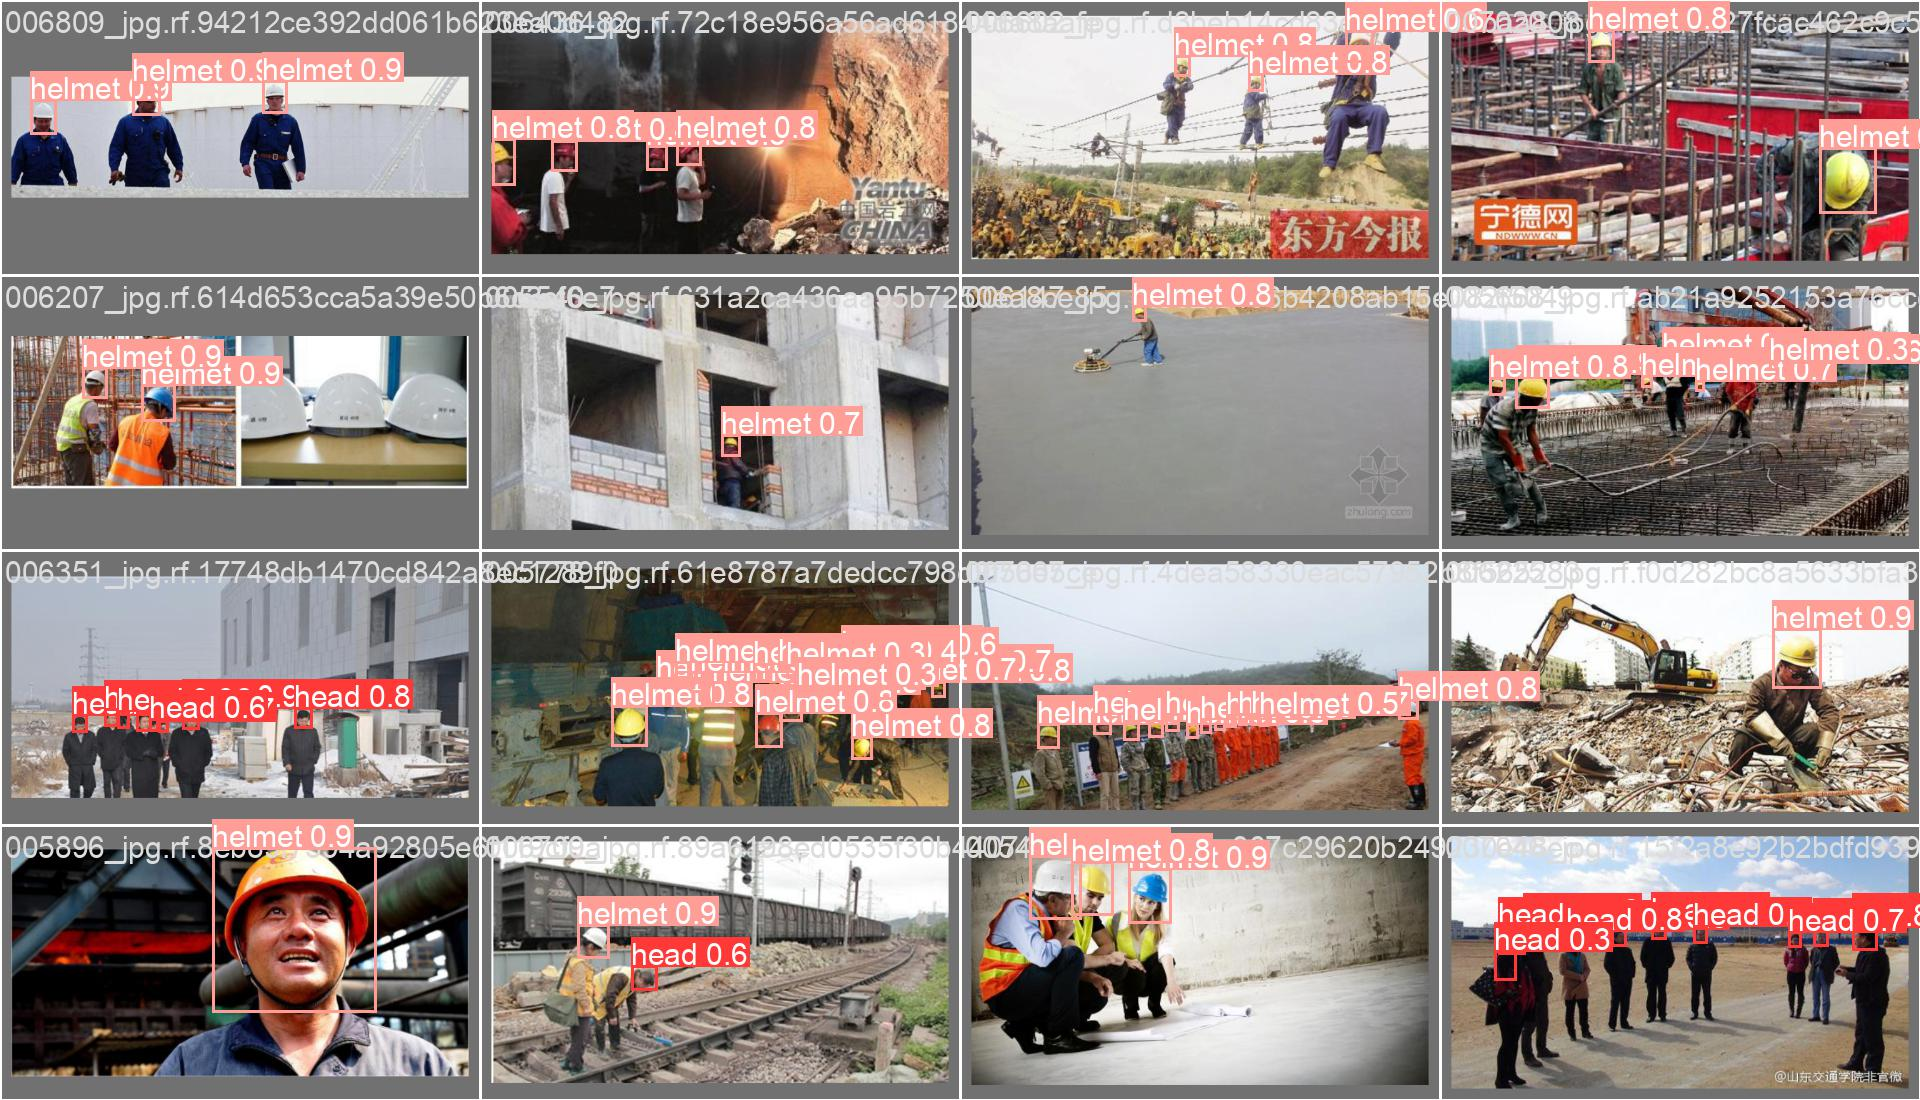

Predictions are pretty similar overall

------------

When we run the model, we store a trained version of it in the `runs` folder. So, if we wanted to run inference and detect on more images, we would just have to load the model again, no re-training needed.